<a href="https://colab.research.google.com/github/olhaVic/Phyton_2025_Ap/blob/master/Dif_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-53449051f25e>:100: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([-1, 4])


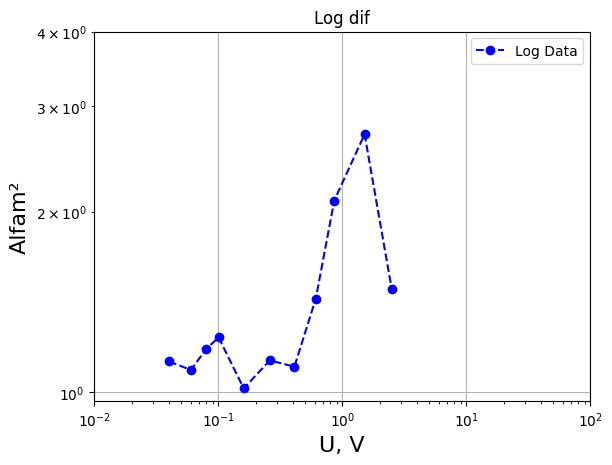

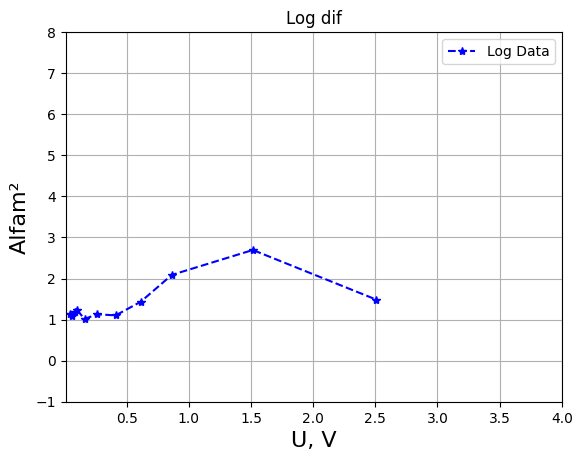

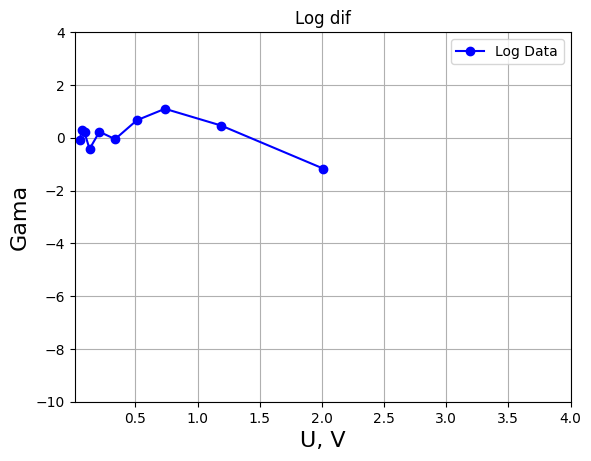

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# def method_sum(arg1, arg2):
#   return arg1 + arg2


# method_sum(param1, param2)


# class Test:
#   def __init__(self):
#     self.param1 = 0
#     self.param2 = 1
#     self.param_sum = 0

#   def param1_get(self):
#     return self.param1

#   def param1_set(self, value):
#     self.param1 = value

#   def param2_get(self):
#     return self.param2

#   def param2_set(self, value):
#     self.param2 = value

#   def method_caluc1_sum(self, arg1, arg2):
#     return arg1 + arg2

#   def method_calc2_sum(self):
#     self.param_sum = self.param1 + self.param2

#   def method_calc2_sum_and_return(self):
#     self.param_sum = self.param1 + self.param2
#     return self.param_sum

#   def method_calc3_sum_and_return(self):
#     return self.param1 + self.param2

#   def method_calc4_sum_and_return(self):
#     return self.param_sum

#   def print_param(self):
#     print(self.param_sum)

#   def print_param2(self):
#     print(self.method_calc4_sum_and_return())

#   def print_params(self):
#     self.method_calc2_sum()
#     print(self.param_sum)

#   def print_params(self):
#     param_sum = self.method_calc3_sum_and_return()
#     print(param_sum)

#   def print_params(self):
#     self.method_calc2_sum_and_return()
#     print(self.param_sum)


class Alfa:
  def __init__(self, data):
     self.data = data
     self.V_array = np.array(self.data.iloc[:, 0])
     self.j_array = np.array(self.data.iloc[:, 1])

  def alfaCalc(self):
   self.alfa_arrays = []
   self.V_x = []
   for i in range(len(self.V_array)):
        if i + 1 >= len(self.j_array):
           break
        v = (self.V_array[i+1]+self.V_array[i])/2
        alfa = ((self.V_array[i+1]+self.V_array[i])/(self.V_array[i+1]-self.V_array[i]))*((self.j_array[i+1]-self.j_array[i])/(self.j_array[i+1]+self.j_array[i]))
        self.alfa_arrays.append(alfa)
        self.V_x.append(v)
  def getAlfaData(self):
      return zip(self.alfa_arrays, self.V_array)
  def writeAlfa_Vtxt(self):
    with open("result.txt", "w") as file:
        for alfa, v in self.getAlfaData():
             file.write(f"{v} {alfa}\n ")

  def plotAlfa(self):
    if self.alfa_arrays is None:
            print("Alfa values are not calculated. Call alfaCalc first.")
            return
    plt.plot(self.V_x, self.alfa_arrays, label='Log Data', linestyle='--', marker='o', color='b')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('U, V', fontsize=16)
    plt.ylabel('Alfam²', fontsize=16)
    plt.title('Log dif')
    plt.xlim([0.01, 100])
    plt.ylim([-1, 4])
    plt.legend()
    plt.grid(True)
    plt.show()
  def plotAlfa_liner(self):
    if self.alfa_arrays is None:
            print("Alfa values are not calculated. Call alfaCalc first.")
            return
    plt.plot(self.V_x, self.alfa_arrays, label='Log Data', linestyle='--', marker='*', color='b')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.xlabel('U, V', fontsize=16)
    plt.ylabel('Alfam²', fontsize=16)
    plt.title('Log dif')
    plt.xlim([0.01, 4])
    plt.ylim([-1, 8])
    plt.legend()
    plt.grid(True)
    plt.show()

class Gama(Alfa):
  def __init__(self, data):
        super().__init__(data)
  def gamaCalc(self):
        self.gama_arrays = []
        self.V_k_array = []

        self.alfaCalc()
        for k in range(len(self.V_x)):
            if k + 1 >= len(self.alfa_arrays):
               break
            V_k=(self.V_x[k+1] + self.V_x[k])/2
            self.V_k_array.append(V_k)
            gama = ((self.V_x[k+1] + self.V_x[k]) / (self.V_x[k+1] - self.V_x[k])) * ((self.alfa_arrays[k+1] - self.alfa_arrays[k]) / (self.alfa_arrays[k+1] + self.alfa_arrays[k]))
            self.gama_arrays.append(gama)

  def getGamaData(self):
      return zip(self.gama_arrays, self.V_k_array)
  def writeGama_Vtxt(self):
    with open("resultgama.txt", "w") as file:
        for gama, v in self.getGamaData():
             file.write(f"{gama} {v}\n")

  def plotGama(self):
    if self.gama_arrays is None:
            print("Alfa values are not calculated. Call alfaCalc first.")
            return
    plt.plot(self.V_k_array, self.gama_arrays, label='Log Data',  marker='o', color='b')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.xlabel('U, V', fontsize=16)
    plt.ylabel('Gama', fontsize=16)
    plt.title('Log dif')
    plt.xlim([0.01, 4])
    plt.ylim([-10, 4])
    plt.legend()
    plt.grid(True)
    plt.show()

    # def plotGama(self):
    #   if self.gama_arrays is None:
    #           print("Alfa values are not calculated. Call alfaCalc first.")
    #           return
    # plt.plot(self.V_array[:-2], self.gama_arrays, label='Log Data',  marker='o', color='b')
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.xlabel('U, V', fontsize=16)
    # plt.ylabel('Gama', fontsize=16)
    # plt.title('Log dif')
    # plt.xlim([0.01, 101])
    # plt.ylim([-10, 4])
    # plt.legend()
    # plt.grid(True)
    # plt.show()
mel1= pd.read_excel('/content/mel1.xlsx')
# mel2= pd.read_excel('/content/mel2.xlsx')
# mel3= pd.read_excel('/content/mel3.xlsx')
dfs = {}
data = [ mel2]
names = [ "mel2"]
for name, df in zip(names,data):
   dfs[name] = df
   df.columns = ["V", "J"]

res = pd.concat(dfs.values(), keys=dfs.keys())


alfa1 = Alfa(res)
alfa1.alfaCalc()
alfa1.writeAlfa_Vtxt()
alfa1.plotAlfa()
alfa1.plotAlfa_liner()
plt.ylim(0, 5)

gama1 = Gama(df)
gama1.gamaCalc()
gama1.writeGama_Vtxt()
gama1.plotGama()
